Assignment 12 
Applied Machine Learning 

Credit card fraud costs about 1% of their revenue to the banks, an amount which customers (us) eventually pay. Let's find those anomalies which might reveal a fraud. Download the popular credit card dataset from Kaggle. 

1. [10 pts] Explore the dataset, list the number of rows and columns, check sanity, and examine the features (e.g. with histograms or plots). 

In [1]:
## DATASET EXPLORATION
%matplotlib inline
import numpy as np
import pandas as pd 
import seaborn as sns; 
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
pd.options.display.max_rows = 100
plt.rcParams["figure.dpi"] = 300
sns.set(style="ticks", color_codes=True) 

## DATA PIPELINE
df = pd.read_csv("creditcard.csv")
print(f"Dataset Shape: {df.shape}")
print(f"Number of Duplicate Samples: {df.duplicated().sum()}")

sample = df.iloc[0]
dtypes = df.dtypes
nans = 100 * df.isna().sum() / len(df)
categories = df.nunique()
print(pd.concat(
    (sample, dtypes, nans, categories), 
    keys=["Sample", "Datatypes", "NaN %", "Num Categories"], 
    axis=1)
)

Dataset Shape: (284807, 31)
Number of Duplicate Samples: 1081
            Sample Datatypes  NaN %  Num Categories
Time      0.000000   float64    0.0          124592
V1       -1.359807   float64    0.0          275663
V2       -0.072781   float64    0.0          275663
V3        2.536347   float64    0.0          275663
V4        1.378155   float64    0.0          275663
V5       -0.338321   float64    0.0          275663
V6        0.462388   float64    0.0          275663
V7        0.239599   float64    0.0          275663
V8        0.098698   float64    0.0          275663
V9        0.363787   float64    0.0          275663
V10       0.090794   float64    0.0          275663
V11      -0.551600   float64    0.0          275663
V12      -0.617801   float64    0.0          275663
V13      -0.991390   float64    0.0          275663
V14      -0.311169   float64    0.0          275663
V15       1.468177   float64    0.0          275663
V16      -0.470401   float64    0.0          275663
V1

In [2]:
## ANALYZE NUMERIC FEATURE DISTRIBUTIONS
print(pd.concat((
    df.iloc[0], 
    df.dtypes, 
    df.max(), 
    df.min(), 
    df.std()
    ), keys=["Sample", "Datatypes", "Max", "Min", "Std"], axis=1)
)

            Sample Datatypes            Max         Min           Std
Time      0.000000   float64  172792.000000    0.000000  47488.145955
V1       -1.359807   float64       2.454930  -56.407510      1.958696
V2       -0.072781   float64      22.057729  -72.715728      1.651309
V3        2.536347   float64       9.382558  -48.325589      1.516255
V4        1.378155   float64      16.875344   -5.683171      1.415869
V5       -0.338321   float64      34.801666 -113.743307      1.380247
V6        0.462388   float64      73.301626  -26.160506      1.332271
V7        0.239599   float64     120.589494  -43.557242      1.237094
V8        0.098698   float64      20.007208  -73.216718      1.194353
V9        0.363787   float64      15.594995  -13.434066      1.098632
V10       0.090794   float64      23.745136  -24.588262      1.088850
V11      -0.551600   float64      12.018913   -4.797473      1.020713
V12      -0.617801   float64       7.848392  -18.683715      0.999201
V13      -0.991390  

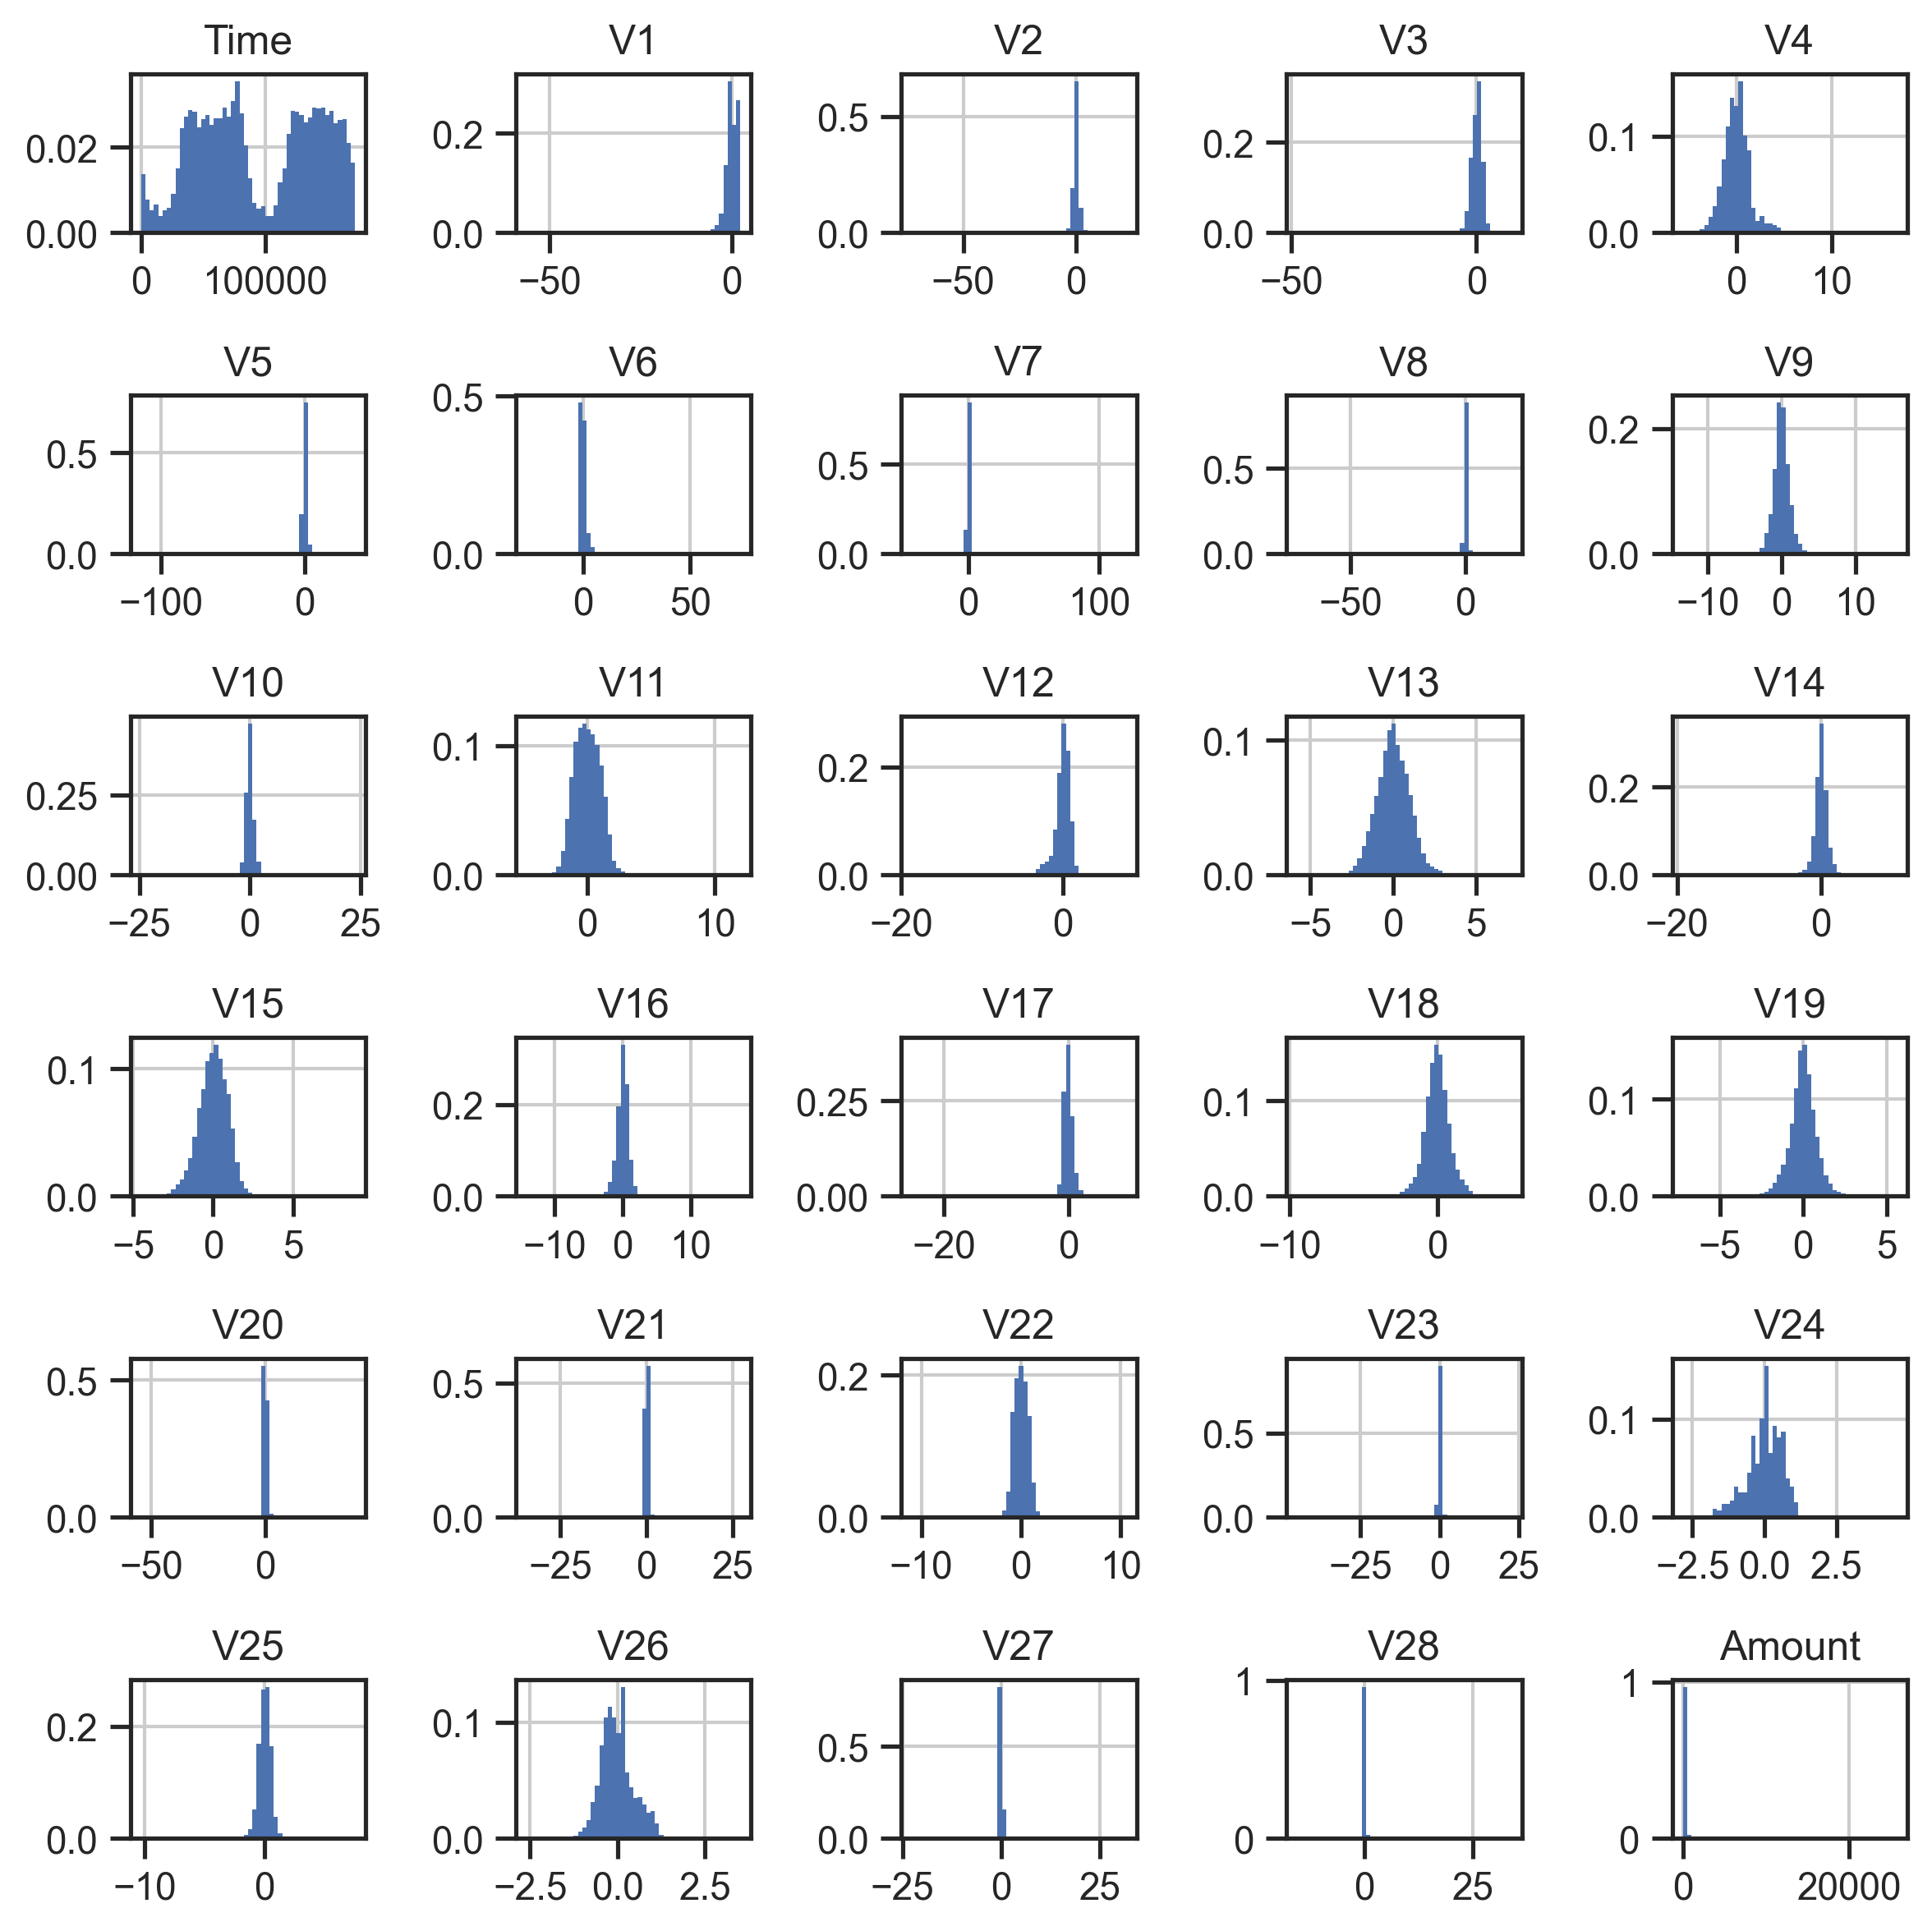

In [3]:
## PLOT DISTRIBUTIONS
df.drop(columns=["Class"]).hist(
    bins=50, 
    figsize=(8,8), 
    layout=(6,5), 
    ec='none', 
    weights=np.zeros(df.shape[0]) + 1. / df.shape[0]
)
plt.tight_layout()

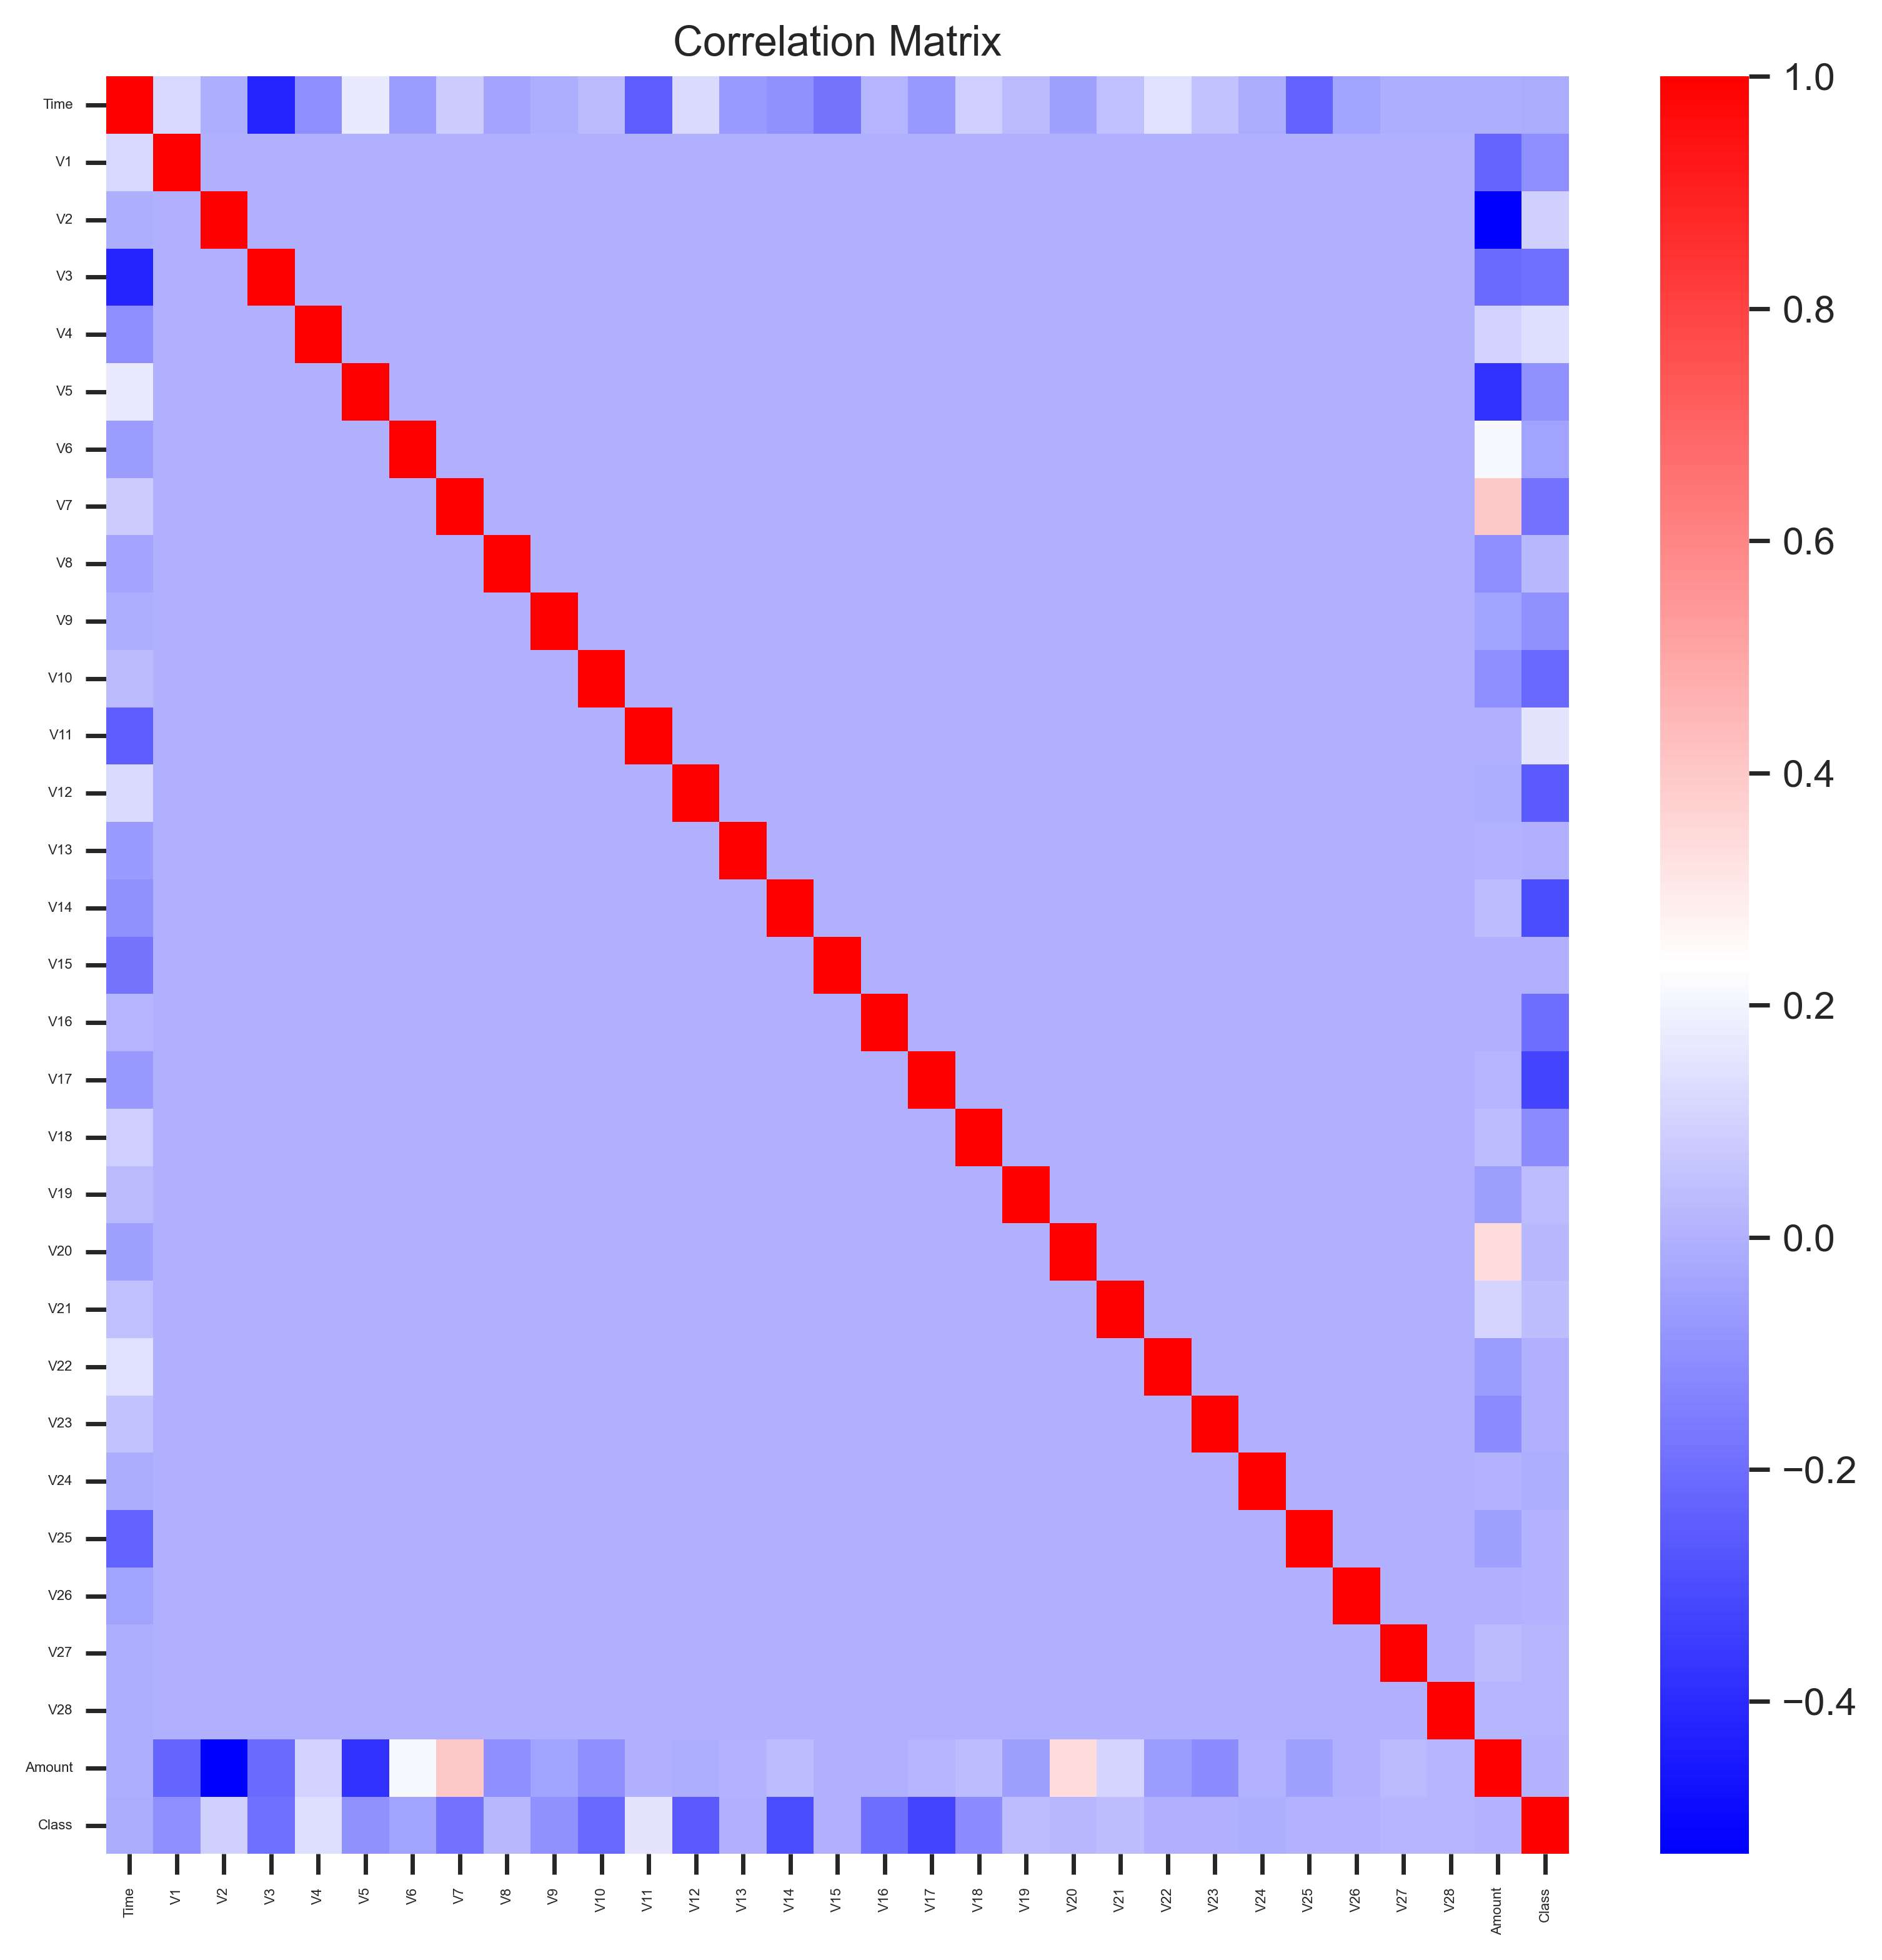

In [4]:
## PLOT CORRELATION MATRIX
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams["figure.dpi"] = 400
heatmap = sns.heatmap(df.corr(), cmap="bwr")
heatmap.set_title("Correlation Matrix")
heatmap.tick_params(axis='both', which='major', labelsize=4)
heatmap.tick_params(axis='both', which='minor', labelsize=4)
plt.tight_layout()

2. [10 pts] Check the class balance, choose an evaluation metric, and justify the choice. 

In [5]:

## CHECK LABELS
n,f = df.shape
classes = set(df["Class"])
assert len(classes) > 1

class_balance = {key: round(100*len(df[df["Class"] == key])/n, 3) for key in classes}
print("CLASS BALANCE PERCENTAGES:", class_balance)

CLASS BALANCE PERCENTAGES: {0: 99.827, 1: 0.173}


This is a binary classification problem with an extreme class imbalance. Due to this, classification accuracy is not a meaningful metric. Thus we will use the F1-score to measure performance of our models as it takes the harmonic mean of precision and recall, giving us a much better measure of whether the models are appropriately assigning each instance to the correct class. 

3. [10 pts] Check if you need normalization or standardization, and justify. Complete pre-processing. 

In [6]:
## DROP DUPLICATES
df.drop_duplicates(inplace=True)

## MIN/MAX NORMALIZE DATA
for col in df.columns:
    if col == "Class": continue
    df[col] = df[col].astype(np.float32)
    mx = df[col].max()
    mn = df[col].min()
    df[col] = (df[col] - mn) / (mx-mn+1e-10)

## PRINT CLEAN DF
print(pd.concat((
    df.iloc[0], 
    df.dtypes, 
    df.max(), 
    df.min(), 
    df.std()
    ), keys=["Sample", "Datatypes", "Max", "Min", "Std"], axis=1)
)

          Sample Datatypes  Max  Min       Std
Time    0.000000   float32  1.0  0.0  0.274787
V1      0.935192   float32  1.0  0.0  0.033095
V2      0.766490   float32  1.0  0.0  0.017375
V3      0.881365   float32  1.0  0.0  0.026143
V4      0.313023   float32  1.0  0.0  0.062690
V5      0.763439   float32  1.0  0.0  0.009270
V6      0.267669   float32  1.0  0.0  0.013391
V7      0.266815   float32  1.0  0.0  0.007479
V8      0.786444   float32  1.0  0.0  0.012648
V9      0.475312   float32  1.0  0.0  0.037738
V10     0.510601   float32  1.0  0.0  0.022270
V11     0.252484   float32  1.0  0.0  0.060579
V12     0.680908   float32  1.0  0.0  0.037489
V13     0.371591   float32  1.0  0.0  0.077053
V14     0.635591   float32  1.0  0.0  0.032017
V15     0.446084   float32  1.0  0.0  0.068395
V16     0.434392   float32  1.0  0.0  0.027785
V17     0.737173   float32  1.0  0.0  0.024480
V18     0.655066   float32  1.0  0.0  0.057592
V19     0.594863   float32  1.0  0.0  0.063518
V20     0.582

The dataset consists entirely of seemingly abstract numeric features of varying scales. The decision tree and random forest models do not need normalization, but the SVC and MLP models will both benefit greatly from min-max normalization. Thus we will provide all models the same normalized data. 

Because there is such a massive class imbalance, it is likely that samples from the positive class may appear as outliers in some of the feature distributions. Since I am unfamiliar with the features and do not have a good intuition for what might constitute an erroneous outlier from a natural one, I will leave them in for this first training pass. 

4. [10 pts] Split the dataset 50-50 for training and testing. Then, without any tree pruning or regularization, run classifiers of the following types:  
• SVC 
• DecisionTreeClassifier 
• MLPClassifier 
• RandomForest 
Report each one’s classification performance. 

In [7]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics


def f_score(conf):
    tp = conf[1,1]
    fp = conf[1,0]
    fn = conf[0,1]
    return (2*tp) / (2*tp+fp+fn)

def train(X, y, model_class=None, model_config=None, model=None, shuffle=False, split=0.5):
    assert (model_class and model_config is not None) or model, \
        "Must provide an initialized model or a class and config"
        
    ## TRAIN MODEL
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=shuffle, train_size=split, random_state=42, stratify=y)
    model = model or model_class(**model_config)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    ## COMPUTE METRICS
    fsc = f_score(metrics.confusion_matrix(y_test, y_pred))
    acc = metrics.accuracy_score(y_test, y_pred)

    print(f"{model.__class__.__name__} Accuracy: {100*acc:.4}%")
    print(f"F-Score: {100*fsc:.4}%")
    return acc, fsc


X = df.drop(columns=["Class"]).values
y = df["Class"].values

In [8]:
## SVC
model_config = {"kernel":"linear", "probability":True, "random_state":42}
acc, fsc = train(X, y, SVC, model_config, split=0.5, shuffle=True)

SVC Accuracy: 99.94%
F-Score: 81.35%


In [9]:
## NEURAL NET
model_config = {"random_state":42}
acc, fsc = train(X, y, MLPClassifier, model_config, split=0.5, shuffle=True)

MLPClassifier Accuracy: 99.91%
F-Score: 71.19%


In [10]:
## DECISION TREE
model_config = {"random_state":42}
acc, fsc = train(X, y, DecisionTreeClassifier, model_config, split=0.5, shuffle=True)

DecisionTreeClassifier Accuracy: 99.91%
F-Score: 73.36%


In [11]:
## RANDOM FOREST
model_config = {"random_state":42}
acc, fsc = train(X, y, RandomForestClassifier, model_config, split=0.5, shuffle=True)

RandomForestClassifier Accuracy: 99.95%
F-Score: 84.53%


5. [10 pts] Now use tree pruning and/or regularization to run classifiers of the following types: 
• SVC 
• DecisionTreeClassifier 
• MLPClassifier 
(Hint: you might use GridSearchCV to optimize the regularization parameters, or simply run a few pilot tests). Report each one’s classification performance. Make sure to use the same subsets as above to train and test. 

In [16]:
## SVC + REGULARIZATION
model_config = {"kernel":"linear", "probability":True, "C":5, "random_state":42}
acc, fsc = train(X, y, SVC, model_config, split=0.5, shuffle=True)

SVC Accuracy: 99.94%
F-Score: 81.51%


In [15]:
## NEURAL NET + REGULARIZATION
model_config = {"alpha": 0.001, "random_state":42}
acc, fsc = train(X, y, MLPClassifier, model_config, split=0.5, shuffle=True)

MLPClassifier Accuracy: 99.91%
F-Score: 70.45%


In [14]:
## DECISION TREE
model_config = {"ccp_alpha": 0.00001, "random_state":42} #, "min_samples_split": 10}
acc, fsc = train(X, y, DecisionTreeClassifier, model_config, split=0.5, shuffle=True)

DecisionTreeClassifier Accuracy: 99.94%
F-Score: 79.43%


I was able to acheive a better F-Score with regularlization of the SVC and pruning of the Decision Tree, but I was not able to find a parameter for the L2 regularization of the MLP that yielded a better score. 

6. [30 pts] Script a PyTorch neural network with a hidden layer. (You could also experiment with 2 hidden layers, with sizes between 20 and 40). Report its classification performance, using the same 50-50 subsets. (Expect a similar performance to the neural network in Q5.) 

In [44]:
import torch
import torch.nn as nn
import random

## PYTORCH IMPLEMENTATION FROM LECTURE
class PyTorchMLP(nn.Module):  # One hidden layer
    def __init__(self, n_hidden=10, epochs=100, eta=0.001, minibatch_size=50, seed=0):
        super(PyTorchMLP, self).__init__()
        random.seed(seed)
        np.random.seed(seed)
        torch.manual_seed(seed)
        self.random = np.random.RandomState(seed)  # shuffle mini batches
        self.n_hidden = n_hidden  # size of the hidden layer
        self.epochs = epochs  # number of iterations
        self.eta = eta  # learning rate
        self.minibatch_size = minibatch_size  # size of training batch - 1 would not work
        self.optimizer = None
        self.loss_func = nn.CrossEntropyLoss()
        self.model = None

    def init_layers(self, _M:int, _K:int) -> None:
        # data structure
        self.model = nn.Sequential(
            nn.Linear(_M, self.n_hidden),
            nn.ReLU(),
            nn.Linear(self.n_hidden, self.n_hidden),
            nn.ReLU(),
            nn.Linear(self.n_hidden, _K),
        )
    
    def predict(self, _X):
        _X = torch.FloatTensor(_X)
        assert self.model is not None
        self.model.eval()
        with torch.no_grad():
            y_pred = np.argmax(self.model(_X), axis=1)
        self.model.train()
        return y_pred.numpy()

    def fit(self, _X_train, _y_train, info=False):
        import sys
        _X_train, _y_train = torch.FloatTensor(_X_train), torch.LongTensor(_y_train)
        n_features= _X_train.shape[1]
        n_output= np.unique(_y_train).shape[0]  # number of class labels
        
        self.init_layers(n_features, n_output)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.eta)  # connect model to optimizer

        for i in range(self.epochs):
            indices = np.arange(_X_train.shape[0])
            self.random.shuffle(indices)  # shuffle the data each epoch

            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                self.optimizer.zero_grad()
                
                net_out = self.model(_X_train[batch_idx])
                
                loss = self.loss_func(net_out, _y_train[batch_idx])
                loss.backward()
                self.optimizer.step()
                
                if info:
                    sys.stderr.write(f"\r{i+1:03d} Loss: {loss.item():6.5f}")
                    sys.stderr.flush()
        return self

In [52]:
## NEURAL NET + REGULARIZATION
model_config = {"n_hidden": 40, "seed":42, "minibatch_size":512}
acc, fsc = train(X, y, PyTorchMLP, model_config, split=0.5, shuffle=True)

PyTorchMLP Accuracy: 99.95%
F-Score: 83.14%


I modified the class provided in lecture by replacing the optimizer with Adam, all activation functions with ReLU, and trained with a much larger batch size (512) and a hidden layer with 40 nodes. This PyTorch model has a much higher F-Score than the default MLP provided by sklearn. 

7. [10 pts] Add dropout to the PyTorch neural network and repeat the previous step. Note that a robust model, even with a performance comparable to Q5. or Q6.’s neural networks, is always preferred. Why? 

In [55]:
## PYTORCH DROPOUT IMPLEMENTATION FROM LECTURE
class DropoutMLP(PyTorchMLP):
    def init_layers(self, _M, _K):
        self.model = nn.Sequential(
            nn.Linear(_M, self.n_hidden),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(self.n_hidden, self.n_hidden),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(self.n_hidden, _K),
        )    

In [58]:
## NEURAL NET + REGULARIZATION
model_config = {"n_hidden": 40, "seed":42, "minibatch_size":512}
acc, fsc = train(X, y, DropoutMLP, model_config, split=0.5, shuffle=True)

DropoutMLP Accuracy: 99.95%
F-Score: 83.19%


I was not able to find a configuration of parameters that lead the dropout MLP to have more than a marginal F-Score increase over the baseline MLP. Increased robustness means both better and more predictable performance on non-training data. In almost all applications, reliability is highly desirable as other parts of a larger system benefit from it. 

8. [10 pts] Train a Random Forest classifier with 10-fold CV; revisit the two PyTorch neural network from Q6. and Q7. And train them with 10-fold CV as well. Comment on the results. 

In [21]:
from sklearn.model_selection import StratifiedKFold

def train_cv(X, y, model_class=None, model_config=None, model=None, k=10, shuffle=False):
    assert (model_class and model_config is not None) or model, \
        "Must provide an initialized model or a class and config"

    ## K-FOLD CROSS VALIDATION
    acc, fsc = [], []
    kfold = StratifiedKFold(n_splits=k, shuffle=shuffle, random_state=42)
    for i_train, i_test in kfold.split(X, y):
        ## TRAIN MODEL
        model = model_class(**model_config)
        model.fit(X[i_train], y[i_train])
        y_pred = model.predict(X[i_test])

        ## COMPUTE METRICS
        fsc.append(f_score(metrics.confusion_matrix(y[i_test], y_pred)))
        acc.append(metrics.accuracy_score(y[i_test], y_pred))

    print(f"{model.__class__.__name__} {k}-fold Mean Accuracy: {100*np.mean(acc):.4} ±{100*np.std(acc):.3}%")
    print(f"Mean F-Score: {100*np.mean(fsc):.4}%")

    return acc, fsc

In [22]:
## REDUCE TRAINING SET SIZE, OTHERWISE COMPUTE TIME IS PROHIBITIVE (1+ Hour)
X_train, _, y_train, _ = train_test_split(X, y, shuffle=True, train_size=0.2, random_state=42, stratify=y)

## RANDOM FOREST K-FOLD
model_config = {"random_state":42}
acc, fsc = train_cv(X_train, y_train, RandomForestClassifier, model_config, k=10, shuffle=True)

RandomForestClassifier 10-fold Mean Accuracy: 99.94 ±0.019%
Mean F-Score: 80.48%


In [56]:
## MLP K-FOLD
model_config = {"n_hidden": 40, "seed":42, "minibatch_size":512}
acc, fsc = train_cv(X_train, y_train, PyTorchMLP, model_config, k=10, shuffle=True)

PyTorchMLP 10-fold Mean Accuracy: 99.92 ±0.0177%
Mean F-Score: 75.62%


In [57]:
## DROPOUT MLP K-FOLD
model_config = {"n_hidden": 40, "seed":42, "minibatch_size":512}
acc, fsc = train_cv(X_train, y_train, DropoutMLP, model_config, k=10, shuffle=True)

DropoutMLP 10-fold Mean Accuracy: 99.93 ±0.0215%
Mean F-Score: 76.5%


The F-Score performance of all models was lower than when training with a single training split. This could arise from a number of factors: (1) we are using a much smaller subset of the training data to do the cross valitation (10%) due to the prohibitive computation time of using the full dataset, (2) Each individual fold is trained on less data, which is likely to produce a slightly less robust model on average, and (3) a single training split is more likely to overestimate model performance, where as K-Fold cross validation gives a better measure of the true performance of the model. 